In [22]:
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
import requests, requests_cache
import pandas as pd
import json
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from bs4 import BeautifulSoup
import re
from os import listdir
from os import chdir
from os.path import isfile, join
#requests_cache.install_cache('coll_cache')

In [9]:
r  = requests.get("http://www.huffingtonpost.com/section/politics")
data = r.text
soup = BeautifulSoup(data)

In [11]:
titles = []

all_titles = soup.findAll('h2')

for i in range(0, len(all_titles)):
    title = all_titles[i].getText()
    title = title.replace("\n", "")
    title = title.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20, 0x2014:0x20 }).encode('ascii', 'ignore')
    titles.append(title)
    
titles = titles[7:50]

In [13]:
def trump_titles(title_names):
    """
    This function filters the article list with trump admin words
    Input: Unfiltered list of titles
    Output: Filtered list of titles
    """
    
    trumps_admin = ['whitehouse','Trump','conway','sessions','pence','president','tillerson','devos','flynn','kushner','carson','department','preibus','bannon','spicer','miller']

    total_titles = []

    for admin in trumps_admin:
        titles1 = [x for x in title_names if admin in x]
        total_titles.extend(titles1)

    return total_titles

In [14]:
def write_text(titles, file_name):
    """
    This function writes to a text file
    Input: titles and a filename
    Output: a new txt file in your directory
    """
    
    total_titles = titles
    title_file = open(file_name, "a")

    for i in range(0, len(total_titles)):
        temp = total_titles[i]
        title_file.write(temp + '\n')
    title_file.close()

In [15]:
def read_text(filename):
    """
    This function reads a txt file with filtered or unfiltered list of titles
    Input: A txt file
    Output: Filtered list of titles
    """
    
    title_names = []
    text_file = open(filename,"r")

    for line in text_file:
        line = line.strip()
        title_names.append(line)

    return trump_titles(title_names)

In [16]:
filtered = trump_titles(titles)

In [19]:
write_text(filtered, "Huffpost4.txt")

In [49]:
chdir('../Huffpost Titles/') #change directory
onlyfiles = [f for f in listdir('../Huffpost Titles/') if isfile(join('../Huffpost Titles/', f))] 

total_list = []
for i in range(0, len(onlyfiles)):
    trump_articles = read_text(onlyfiles[i])
    total_list = total_list + trump_articles

total_list


['Betsy DeVos Is Right: Professors Are A Threat To The Trumpist Movement',
 "Trump Won't Have A State Of The Union -- It'll Be A Trump Address",
 "Keith Ellison Will Bring Former DNC Opponent As His Guest To Trump's Address",
 'Trump Must Confirm Social Security And Medicare Pledges',
 "Trump's DOJ Will Drop Claim That Texas Voter ID Law Was Purposefully Discriminatory",
 "Trump's Immigration Crackdown Could Endanger Domestic Violence Victims",
 "House Intelligence Chairman Not Interested In A Trump-Russia 'Witch Hunt'",
 "Trump's War On Immigrants Has Already Reached The Supreme Court",
 'Thousands Of Refugees Have Been Resettled In The U.S. Since Trump Signed Order',
 "Trump's Former Labor Nominee Claims He Was Victim Of 'Fake News Tsunami'",
 "Trump Seeks 'Historic Increase' In Defense Spending, Cuts Elsewhere",
 'Here Are All The Favors Donald Trump Has Performed For Wall Street',
 "As SEALs Fought For Their Lives, Trump's Account Sent And Deleted A TV Tweet",
 'CPAC Crowd Duped In

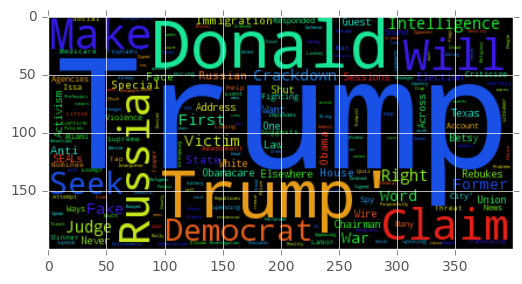

In [50]:
joined_articles = ' '.join(total_list)
wordcloud = WordCloud().generate(joined_articles)
plt.imshow(wordcloud)
plt.show()